In [1]:
from utils import *

In [2]:
%load_ext autoreload
%autoreload 2

#### Load data

In [3]:
xlsx_pth = "C:/Users/lucas/Desktop/UPC/MIT/tactile2object/manus/data/recorded_data.xlsx"
data = Data(xlsx_pth)
positions_FT = data.getFingertips()

#### Get real data

In [4]:
bone = 'LeftSecondFT'
frames = [5900, 6009, 6190, 6340, 6423, 7690]

touch_locations_real = get_touch_locations_real(positions_FT, bone, frames)

#### Get simulated data

In [5]:
mesh_pth = "C:/Users/lucas/Desktop/UPC/MIT/tactile2object/estimate_object_pose/ycb_converted/035_power_drill.ply"
picked_ids = [6796, 5958, 3626, 153, 563, 4257]
touch_locations_simu, pcd = get_touch_locations_simu(mesh_pth, picked_ids=picked_ids, scale=1.)

#### Translate and rotate real points

In [6]:
Q = np.array(touch_locations_simu).T
P = np.array(touch_locations_real).T

R, t = rigid_transform_3D(P, Q)

In [7]:
red = [225/255, 87/255, 89/255]
orange = [242/255, 142/255, 43/255]
yellow = [237/255, 201/255, 72/255]
blue = [78/255, 121/255, 167/255]
green = [89/255, 161/255, 79/255]

In [8]:
touch_locations_real_tr = (R.dot(touch_locations_real.T) + t).T

balls_real_tr = get_balls(touch_locations_real_tr, color=[0,1,0])
balls_simu = get_balls(touch_locations_simu)

In [9]:
line_set = get_lines(touch_locations_real_tr, touch_locations_simu)

visualize = [pcd] + balls_real_tr + balls_simu + [line_set]

o3d.visualization.draw_geometries(visualize, zoom=0.9,
                                  front=[0.0, 0.0, -0.5],
                                  lookat=[0.0, 0.0, 0.0],
                                  up=[0.0, 0.4, 0.0])

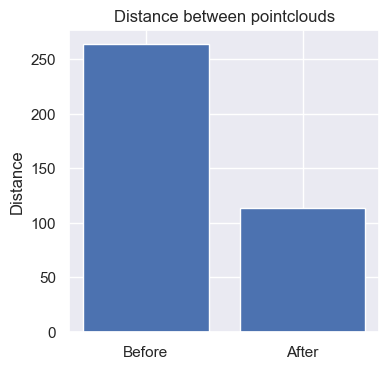

In [11]:
# find mean column wise
centroid_A = np.mean(touch_locations_real, axis=0)
centroid_B = np.mean(touch_locations_simu, axis=0)
A_centered = touch_locations_real - centroid_A
B_centered = touch_locations_simu - centroid_B
norm_before = np.linalg.norm(A_centered - B_centered)

centroid_A = np.mean(touch_locations_real_tr, axis=0)
A_centered = touch_locations_real_tr - centroid_A
norm_after = np.linalg.norm(A_centered - B_centered)

plot_bar_values(norm_before, norm_after)

#### Translate and rotate simulated points

In [12]:
Q = np.array(touch_locations_real).T
P = np.array(touch_locations_simu).T 

R, t = rigid_transform_3D(P, Q)

In [13]:
import copy

touch_locations_simu_tr = (R.dot(touch_locations_simu.T) + t).T

balls_real = get_balls(touch_locations_real)
balls_simu_tr = get_balls(touch_locations_simu_tr, color=[0,1,0])

line_set = get_lines(touch_locations_real, touch_locations_simu_tr)

pcd_tr = copy.deepcopy(pcd)
pcd_tr.rotate(R, center=(0, 0, 0))
pcd_tr.translate((t))

visualize = [pcd_tr] + balls_real + balls_simu_tr + [line_set]

o3d.visualization.draw_geometries(visualize)

#### Plot keypoints

In [14]:
positions_order_l = [
    "LeftCarpus",
    
    "LeftFirstMC",
    "LeftFirstPP",
    "LeftFirstDP",
    "LeftFirstFT",
    
    "LeftSecondPP",
    "LeftSecondMP",
    "LeftSecondDP",
    "LeftSecondFT",
    
    "LeftThirdPP",
    "LeftThirdMP",
    "LeftThirdDP",
    "LeftThirdFT",
    
    "LeftFourthPP",
    "LeftFourthMP",
    "LeftFourthDP",
    "LeftFourthFT", 
    
    "LeftFifthPP",
    "LeftFifthMP",
    "LeftFifthDP",
    "LeftFifthFT"     
]

positions_order_r = [position.replace("Left", "Right") for position in positions_order_l]

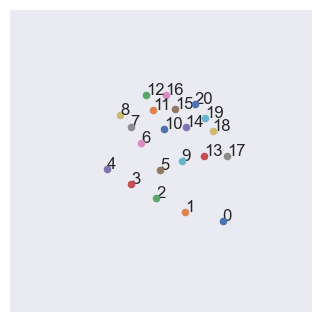

In [15]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

frame = 0

fig = plt.figure()
ax = fig.gca(projection='3d')

for i, a in enumerate(positions_order_l):
    x, y, z = positions_FT.loc[frame, a]
    
    ax.scatter(xs=x, ys=y, zs=z)
    ax.text(x, y, z, str(i), zdir=None)
    
set_axes_equal(ax)
plt.axis('off')
ax.view_init(azim=110, elev=168)


#### Compute keypoints

In [21]:
frame = 0

keypoints_l = np.zeros((len(positions_order_l), 3))

for i, position in enumerate(positions_order_l):
    keypoints_l[i,:] = positions_FT.loc[frame, position] * 1000

In [22]:
frame = 0

keypoints_r = np.zeros((len(positions_order_r), 3))

for i, position in enumerate(positions_order_r):
    keypoints_r[i,:] = positions_FT.loc[frame, position] * 1000

#### Plot keypoints with lines

In [23]:
lines = [(0,1), (1,2), (2,3), (3,4), 
         (0,5), (5,6), (6,7), (7,8), 
         (0,9), (9,10), (10,11), (11, 12), 
         (0,13), (13, 14), (14, 15), (15,16), 
         (0,17), (17,18), (18,19), (19,20)]

%matplotlib qt
plt.style.use('default')

In [24]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

frame = 2234

fig = plt.figure()
ax = fig.gca(projection='3d')

for i, a in enumerate(positions_order_l):
    
    color = 'C' + str((i-1)//4 + 1) 
    
    x, y, z = positions_FT.loc[frame, a]
    
    ax.scatter(xs=x, ys=y, zs=z, color=color)
    #ax.text(x, y, z, str(i), zdir=None)

for start, end in lines:
    start_pos = positions_order_l[start]
    end_pos = positions_order_l[end]
    xyz = np.vstack([positions_FT.loc[frame, start_pos], positions_FT.loc[frame, end_pos]])
    ax.plot(xyz[:,0], xyz[:,1], xyz[:,2], c='black')
    
set_axes_equal(ax)
plt.axis('off')
ax.view_init(azim=110, elev=168)


## Save keypoints for MANO

### Rotate keypoints_l

In [73]:
A = keypoints_l[[0,5,9,13,17]].T

B = np.array([[-94.6605,   1.4790,   3.3575],
             [ -6.5632,  -3.7214,  24.0435],
             [  0.0000,   0.0000,   0.0000],
             [-12.9249,  -2.4785, -23.3157],
             [-25.8735,  -8.4614, -39.8518]]).T

R, t = rigid_transform_3D(A, B)


pcd_keypoints_l = o3d.geometry.PointCloud()
pcd_keypoints_l.points = o3d.utility.Vector3dVector(keypoints_l)

pcd_keypoints_l.rotate(R, center=(0, 0, 0))
pcd_keypoints_l.translate((t))

keypoints_l_tr = np.asarray(pcd_keypoints_l.points)

In [74]:
keypoints_l_tr

array([[-88.73042165,   0.87563045,   3.93195258],
       [-62.9396477 ,   1.83604337,  26.88149356],
       [-36.09484323,  -2.85892849,  42.61193392],
       [-11.85902822,  -7.11349173,  55.15765213],
       [ 13.02664531, -11.49938668,  66.30805923],
       [ -7.41939239,  -1.02684151,  20.68179954],
       [ 27.2149475 , -12.87007715,  17.21365504],
       [ 45.87485903, -19.95960073,  15.11657706],
       [ 63.50384609, -23.60663145,  14.1538901 ],
       [ -7.52001107,  -2.92817487,  -0.82148803],
       [ 27.46493801, -22.30125712,  -5.21325219],
       [ 44.24222296, -39.13036182,  -6.5536923 ],
       [ 55.8439735 , -53.91524247,  -8.70351657],
       [-12.87985156,  -4.50542833, -21.13230585],
       [ 17.20444406, -27.9723652 , -22.74528967],
       [ 32.24172721, -44.87957067, -23.68286132],
       [ 46.37896403, -57.71296905, -23.530358  ],
       [-23.47242333,  -5.59748574, -38.42645824],
       [ -1.23242235, -28.37818194, -36.71625788],
       [ 10.19937443, -41.35989

# Delete

In [84]:
alignment_points_r = np.array([[ 94.6605,   1.4790,   3.3575],
                               [  6.5632,  -3.7214,  24.0435],
                               [  0.0000,   0.0000,   0.0000],
                               [ 12.9249,  -2.4785, -23.3157],
                               [ 25.8735,  -8.4614, -39.8518]])

alignment_points_l = np.array([[-94.6605,   1.4790,   3.3575],
                               [ -6.5632,  -3.7214,  24.0435],
                               [  0.0000,   0.0000,   0.0000],
                               [-12.9249,  -2.4785, -23.3157],
                               [-25.8735,  -8.4614, -39.8518]])
alignment_idxs = [0,5,9,13,17]

In [91]:
for frame in range(positions_FT.shape[0]):
    break

In [92]:
keypoints_l = np.zeros((len(positions_order_l), 3))

for i, position in enumerate(positions_order_l):
    keypoints_l[i,:] = positions_FT.loc[frame, position] * 1000

A = keypoints_l[alignment_idxs].T
B = alignment_points_l.T
R, t = rigid_transform_3D(A, B)

keypoints_l_rt = np.matmul(keypoints_l, R.T) + t.T

In [93]:
keypoints_r = np.zeros((len(positions_order_r), 3))

for i, position in enumerate(positions_order_r):
    keypoints_r[i,:] = positions_FT.loc[frame, position] * 1000

A = keypoints_r[alignment_idxs].T
B = alignment_points_r.T
R, t = rigid_transform_3D(A, B)
    
keypoints_r_rt = np.matmul(keypoints_r, R.T) + t.T

In [94]:
keypoints_l_rt

array([[-88.73018128,   0.87552646,   3.9319085 ],
       [-62.94033548,   1.83508429,  26.88120907],
       [-38.54293181, -11.00885654,  42.04497562],
       [-16.55831508, -22.38908235,  54.29344605],
       [  5.66166717, -33.80949364,  66.07100924],
       [ -7.419612  ,  -1.02650716,  20.68112199],
       [ 28.36644289,  -9.44211543,  20.0892651 ],
       [ 47.73088828, -14.69923462,  19.61387729],
       [ 65.66176963, -16.54997207,  19.87281518],
       [ -7.52006015,  -2.92862808,  -0.82125588],
       [ 29.79181368, -17.57373078,  -4.26524245],
       [ 51.40623584, -27.3962317 ,  -5.94021693],
       [ 69.40679806, -32.39748942,  -8.90370085],
       [-12.8796294 ,  -4.50539909, -21.13214236],
       [ 24.13672674, -13.64295261, -23.2835732 ],
       [ 45.68322511, -20.40163762, -24.99887669],
       [ 64.69960654, -21.82219099, -25.96846497],
       [-23.47261716,  -5.59729214, -38.42613224],
       [  6.79362163, -15.30944409, -40.90145552],
       [ 22.82200468, -21.75293